In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from math import log
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/dementia_dataset (1).csv")
dataset

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
import pandas as pd

# dataset = pd.read_csv('/content/drive/MyDrive/Dataset/dementia_dataset.csv')

column_to_shift = 'Group'

column = dataset.pop(column_to_shift)
dataset[column_to_shift] = column

# dataset.to_csv('/content/drive/MyDrive/Dataset/dementia_dataset.csv', index=False)

In [ ]:
dataset.isnull().sum()

Subject ID     0
MRI ID         0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
Group          0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Visit       373 non-null    int64  
 3   MR Delay    373 non-null    int64  
 4   M/F         373 non-null    object 
 5   Hand        373 non-null    object 
 6   Age         373 non-null    int64  
 7   EDUC        373 non-null    int64  
 8   SES         354 non-null    float64
 9   MMSE        371 non-null    float64
 10  CDR         373 non-null    float64
 11  eTIV        373 non-null    int64  
 12  nWBV        373 non-null    float64
 13  ASF         373 non-null    float64
 14  Group       373 non-null    object 
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
dataset['SES'].fillna(dataset['SES'].median(), inplace=True)
dataset['MMSE'].fillna(dataset['MMSE'].median(), inplace=True)

In [ ]:
dataset.isnull().sum()

Subject ID    0
MRI ID        0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
Group         0
dtype: int64

In [ ]:
dataset.drop('Subject ID', axis=1, inplace=True)
dataset.drop('MRI ID', axis=1, inplace=True)

In [ ]:
labels,counts = pd.factorize(dataset['M/F'])
dataset['M/F'] = labels
labels,counts = pd.factorize(dataset['Hand'])
dataset['Hand'] = labels

In [ ]:
dataset

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,2,457,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
2,1,0,0,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,Demented
3,2,560,0,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,Demented
4,3,1895,0,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,0,0,82,16,1.0,28.0,0.5,1693,0.694,1.037,Demented
369,3,2297,0,0,86,16,1.0,26.0,0.5,1688,0.675,1.040,Demented
370,1,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
371,2,763,1,0,63,13,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


In [ ]:
dataset['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [ ]:
labels,counts = pd.factorize(dataset['Group'])
dataset['Group'] = labels

In [ ]:
print(counts)

Index(['Nondemented', 'Demented', 'Converted'], dtype='object')


In [ ]:
dataset

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,2,457,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,1,0,0,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,2,560,0,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,3,1895,0,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,0,0,82,16,1.0,28.0,0.5,1693,0.694,1.037,1
369,3,2297,0,0,86,16,1.0,26.0,0.5,1688,0.675,1.040,1
370,1,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,0
371,2,763,1,0,63,13,2.0,30.0,0.0,1327,0.796,1.323,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2,
       2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

89.36170212765957
[[41  1  1]
 [ 0 40  1]
 [ 3  4  3]]


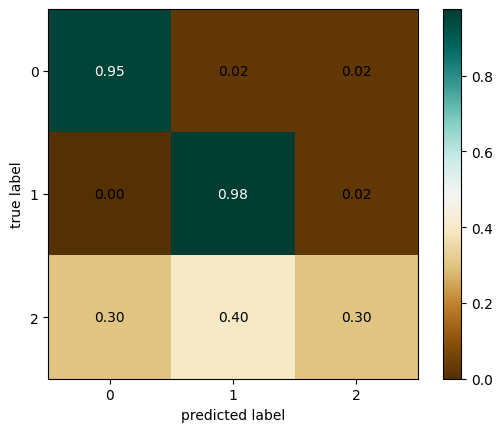

In [ ]:
random = RandomForestClassifier(n_estimators=80 ,criterion='entropy',max_depth=40,random_state=0)
m=random.fit(x_train,y_train)
pred = m.predict(x_test)
randomF = accuracy_score(y_test,pred)*100
print(randomF)

from mlxtend.plotting import plot_confusion_matrix
conf = confusion_matrix(y_true=y_test, y_pred=pred)
print(conf)
fig, ax = plot_confusion_matrix(conf_mat=conf,
                                colorbar=True,
                                cmap='BrBG',
                                show_absolute=False,
                                show_normed=True)

plt.show()

In [ ]:
x_train.shape

(279, 12)

In [ ]:
x_test.shape

(94, 12)

In [ ]:
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting
import pandas as pd # for loading the data as dataframe
import numpy as np # for mathematical operation

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Calculate the accuracy and convert it to percentage
accuracy = knn.score(x_test, y_test) * 100

# Print the accuracy
print("Accuracy of KNN Classifier:", accuracy)


Accuracy of KNN Classifier: 85.1063829787234


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Calculate the accuracy and convert it to percentage
accuracy = gnb.score(x_test, y_test) * 100

# Print the accuracy
print("Accuracy of Gaussian Naive Bayes Classifier:", accuracy)

Accuracy of Gaussian Naive Bayes Classifier: 87.2340425531915


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=5)
rf.fit(x_train, y_train)

# Calculate the accuracy and convert it to percentage
accuracy = rf.score(x_test, y_test) * 100

# Print the accuracy
print("Accuracy of Random Forest Classifier:", accuracy)


Accuracy of Random Forest Classifier: 89.36170212765957


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate and train the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=80, learning_rate=0.01, max_depth=3, random_state=0)
gbc.fit(x_train, y_train)

# Calculate the accuracy and convert it to percentage
accuracy = gbc.score(x_test, y_test) * 100

# Print the accuracy
print("Accuracy of Gradient Boosting Classifier:", accuracy)


Accuracy of Gradient Boosting Classifier: 88.29787234042553


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define the base Decision Tree classifier
base_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Instantiate the AdaBoost classifier with the base model
adaboost = AdaBoostClassifier(base_estimator=base_model, n_estimators=80, random_state=0)

# Train the AdaBoost model
adaboost.fit(x_train, y_train)

# Calculate the accuracy and convert it to percentage
accuracy = adaboost.score(x_test, y_test) * 100

# Print the accuracy
print("Accuracy of AdaBoost Classifier:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of AdaBoost Classifier: 89.36170212765957


In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
base_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(base_estimator=base_model, n_estimators=80, random_state=0)
adaboost.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [ ]:
pickle.dump(adaboost, open('clfmodel.pkl', 'wb'))
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [ ]:
y_pred = adaboost.predict(X_test_scaled)

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

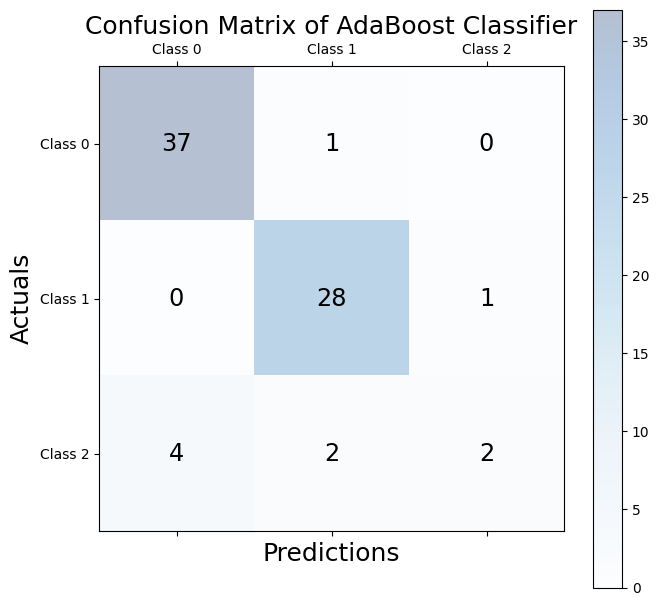

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

# Add color bar
plt.colorbar(cax)

# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

# Set labels
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of AdaBoost Classifier', fontsize=18)
plt.xticks([0, 1, 2], ['Class 0', 'Class 1', 'Class 2'])
plt.yticks([0, 1, 2], ['Class 0', 'Class 1', 'Class 2'])

plt.show()

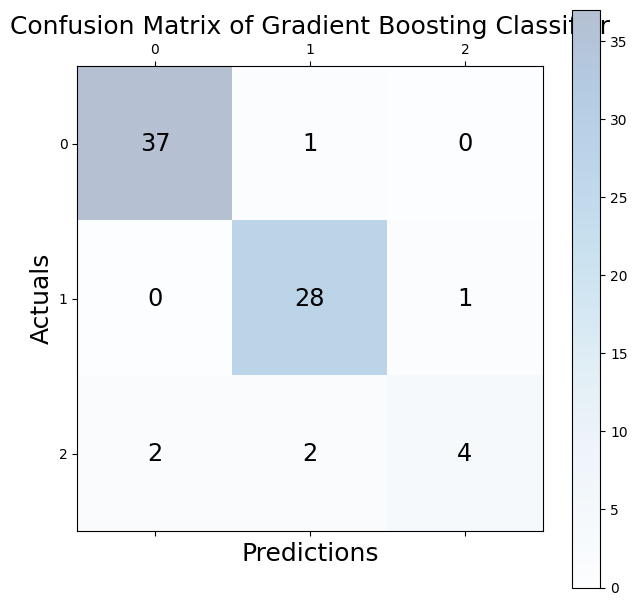

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Train your GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

# Add color bar
plt.colorbar(cax)

# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

# Set labels
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Gradient Boosting Classifier', fontsize=18)
plt.show()


In [ ]:
with open('clfmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('scaling.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
pickle.dump(model, open('clfmodel.pkl', 'wb'))
pickle.dump(scaler, open('scaling.pkl', 'wb'))

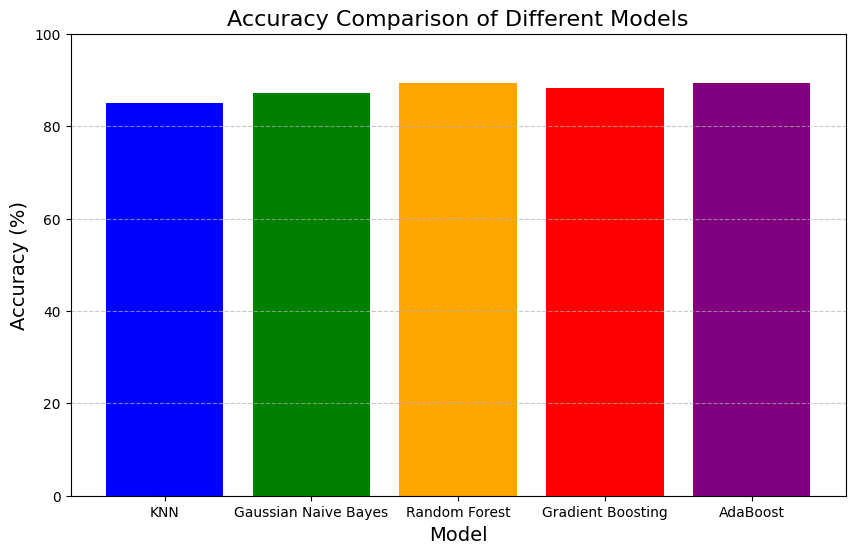

In [ ]:
import matplotlib.pyplot as plt

# Define model names and accuracies
model_names = ['KNN', 'Gaussian Naive Bayes', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
accuracies = [85.1063829787234, 87.2340425531915, 89.36170212765957, 88.29787234042553, 89.36170212765957]

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Accuracy Comparison of Different Models', fontsize=16)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
sample_data = np.array([35,4,1933,1,0,92,14,1.0,27.0,0.5,1423,0.696]).reshape(1, -1)

# Make predictions on the sample data using the AdaBoostClassifier object
prediction = adaboost.predict(sample_data)

# Print the prediction
print("Prediction:", prediction)

Prediction: [2]
